<a href="https://colab.research.google.com/github/AndreaPardoGis/Machine.Learning/blob/main/plot_ols_modificado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Linear Regression Example
The example below uses only the first feature of the `diabetes` dataset,
in order to illustrate the data points within the two-dimensional plot.
The straight line can be seen in the plot, showing how linear regression
attempts to draw a straight line that will best minimize the
residual sum of squares between the observed responses in the dataset,
and the responses predicted by the linear approximation.

The coefficients, residual sum of squares and the coefficient of
determination are also calculated.


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


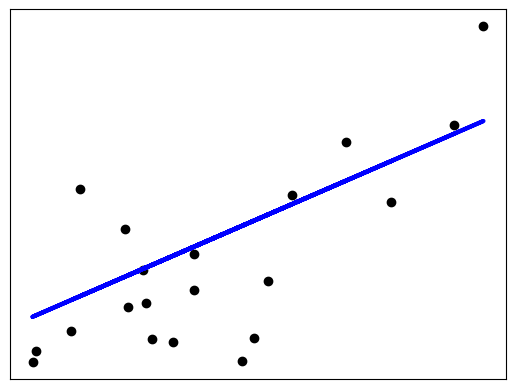

In [32]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

##Cambiar la característica del dataset de diabetes##

En el tutorial se usa una sola caracteristica del dataset de diabetes. Cambiare la caracteristica para ver como afecta

In [35]:
# Usamos la tercera característica (por ejemplo)
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 3]


In [36]:
from sklearn.linear_model import Ridge

# Se crea el modelo de regresión Ridge
ridge_regr = Ridge(alpha=1.0)

# Se entrena el modelo Ridge
ridge_regr.fit(diabetes_X_train, diabetes_y_train)

# Se hace predicciones con Ridge
ridge_y_pred = ridge_regr.predict(diabetes_X_test)

# Comparo los resultados
print(f"Ridge Mean Squared Error: {mean_squared_error(diabetes_y_test, ridge_y_pred):.2f}")
print(f"Ridge R² Score: {r2_score(diabetes_y_test, ridge_y_pred):.2f}")


Ridge Mean Squared Error: 3604.27
Ridge R² Score: 0.25


##A. Otro ejercicio Cambiando el dataset##

Utilizaré un conjunto de datos diferente para ver como afecta al resultado. En lugar del dataset diabetes, probaré con otro dataset de sklearn, como el California Housing dataset:

In [7]:
from sklearn.datasets import fetch_california_housing

# Cargar el dataset de California housing
california = fetch_california_housing()

# Se usa solo una caracteristica, por ejemplo, el numero promedio de habitaciones
X = california.data[:, np.newaxis, 2] # AveRooms: promedio de habitaciones
y = california.target

# Se divide en datos de entrenamiento y prueba
X_train = X[:-1000]
X_test = X[-1000:]
y_train = y[:-1000]
y_test = y[-1000:]


In [8]:
# Creamos el modelo de regresion lineal
regr = linear_model.LinearRegression()
# Entrenar el modelo
regr.fit(X_train, y_train)

LinearRegression()

In [9]:
# Hacemos predicciones con el conjunto de prueba
y_pred = regr.predict(X_test)

In [10]:
# Coeficinetes del modelo
print("Coeficientes: \n", regr.coef_)

Coeficientes: 
 [0.07118657]


In [11]:
# Error cuadratico medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squarede Error: {mse:.2f}")

Mean Squarede Error: 1.30


In [12]:
# Coeficiente de determinacion (R^2)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

R² Score: -0.26


##Metricas de evaluación##

Ademas de MSE y R^2 voy a añadir RMSE(Root Mean Squared Error) para obtener otra perspectiva del error del modelo

In [15]:
from math import sqrt

# Calculo el RMSE
rmse = sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 1.14


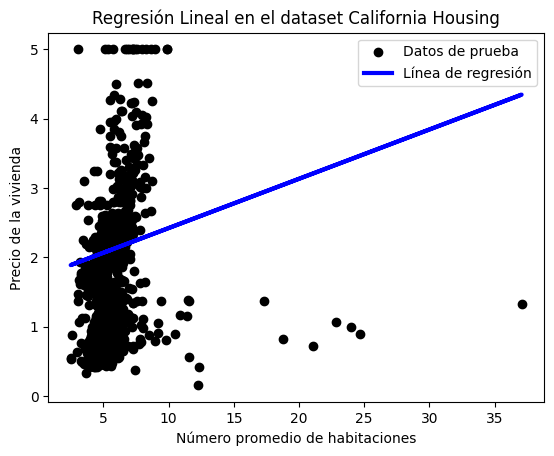

In [18]:
plt.scatter(X_test, y_test, color="black", label="Datos de prueba")
plt.plot(X_test, y_pred, color="blue", linewidth=3, label="Línea de regresión")
plt.xlabel("Número promedio de habitaciones")
plt.ylabel("Precio de la vivienda")
plt.title("Regresión Lineal en el dataset California Housing")
plt.legend()
plt.show()

##B. Probando otra cosa##

1. Creamos datos de ejemplo, generando algunos puntos aleatorios con una tendencia lineal
2. Dividimos el conjunto de datos en entrenamiento y prueba
3. Creamos y entrenamos el modelo de regresion lineal
4. Hacemos predicciones usando el modelo
5. Evaluamos el modelo
6. Visualizamos el resultado

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [23]:
# Generar datos aleatorios con una relación lineal
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [24]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


LinearRegression()

In [26]:
# Predecir con los datos de prueba
y_pred = model.predict(X_test)


In [27]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.6536995137170021
R^2 Score: 0.8072059636181392


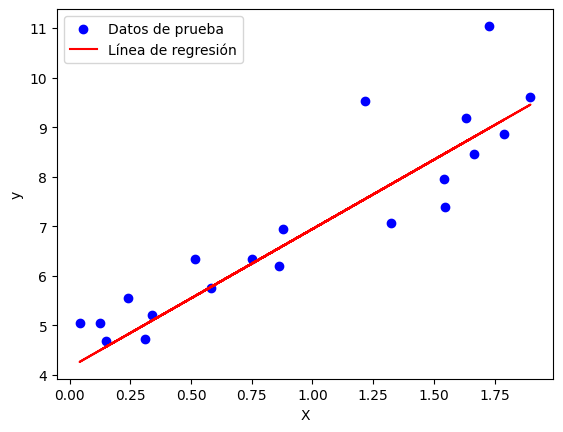

In [28]:
# Visualizar los resultados
plt.scatter(X_test, y_test, color="blue", label="Datos de prueba")
plt.plot(X_test, y_pred, color="red", label="Línea de regresión")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
